In [15]:
#импортирование используемых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
import numpy as np
import statsmodels
import sktime
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [3]:
#считывание датасета
df = pd.read_excel('/Users/New/Desktop/данные/ТВЕРЬАТОМ.xlsx')
df = df.rename(columns={'Дата мск':'Время', 'ТВЕРЬ план':'План ЭЭ', 'ТВЕРЬ факт':'Факт ЭЭ'})
df['% автономных устройств'] = 1
df = df[['Время', 'Факт ЭЭ']]
df = df.iloc[:1440]
df.index = df['Время']
df = df.drop(['Время'], axis=1)
df.head()

,Факт ЭЭ
Время,
2014-06-01 00:00:00,391.526
2014-06-01 01:00:00,355.271
2014-06-01 02:00:00,336.020
2014-06-01 03:00:00,326.523
2014-06-01 04:00:00,315.017


<Axes: title={'center': 'Потребление электроэнергии'}, xlabel='Время'>

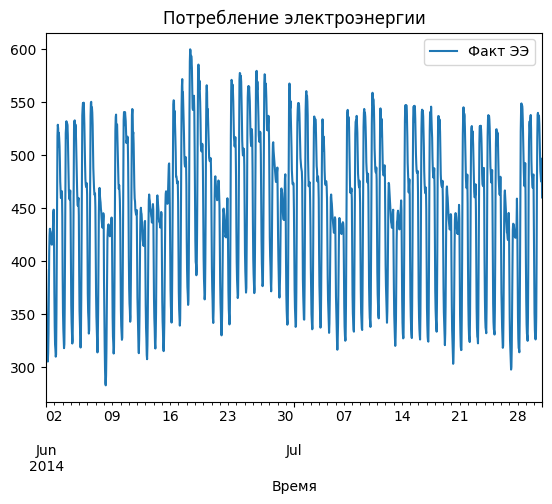

In [5]:
#строим график потребления электроэнергии
df.plot(title='Потребление электроэнергии')

ValueError: keyword labesize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

<Figure size 10000x600 with 0 Axes>

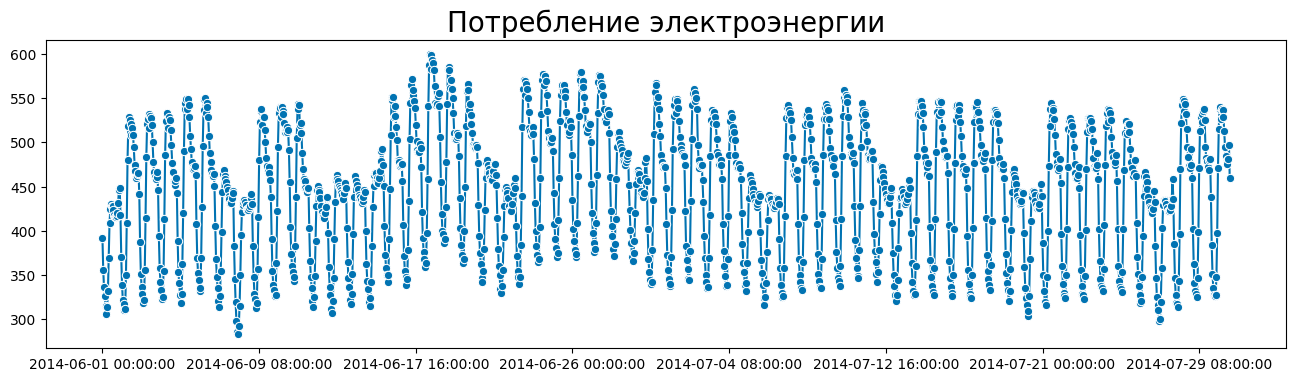

In [7]:
plt.figure(figsize=(100,6))
y = df
plot_series(y)
plt.title("Потребление электроэнергии", fontsize=20, color='black')
plt.tick_params(axis='both', which= 'major', labesize = 14)

In [9]:
#реализуем подсчёт кридерия MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

1392 48


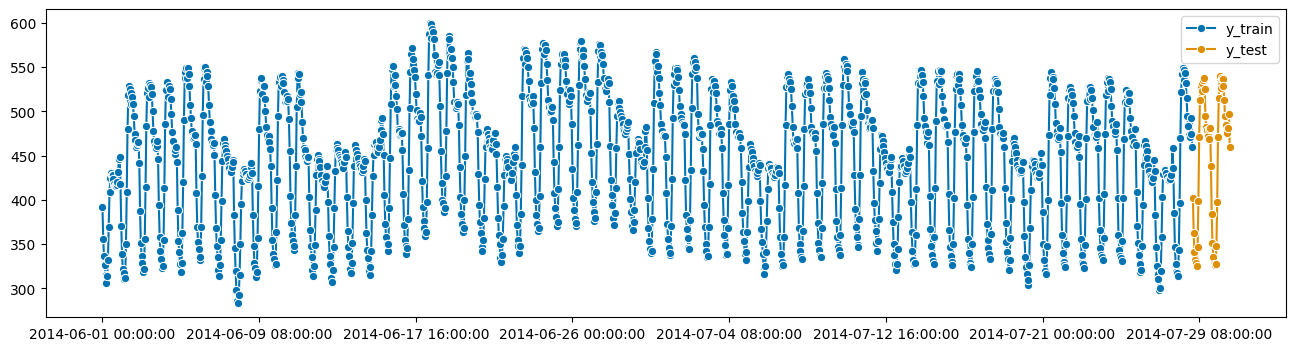

In [13]:
#обозначим прогнозируемый ряд и ряд, который будет использоваться для прогнозирования

y_train, y_test = temporal_train_test_split(y, test_size=48)
plot_series(y_train, y_test, labels = ["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [14]:
#выведем горизонт прогнозирования

from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2014-07-29 00:00:00', '2014-07-29 01:00:00',
               '2014-07-29 02:00:00', '2014-07-29 03:00:00',
               '2014-07-29 04:00:00', '2014-07-29 05:00:00',
               '2014-07-29 06:00:00', '2014-07-29 07:00:00',
               '2014-07-29 08:00:00', '2014-07-29 09:00:00',
               '2014-07-29 10:00:00', '2014-07-29 11:00:00',
               '2014-07-29 12:00:00', '2014-07-29 13:00:00',
               '2014-07-29 14:00:00', '2014-07-29 15:00:00',
               '2014-07-29 16:00:00', '2014-07-29 17:00:00',
               '2014-07-29 18:00:00', '2014-07-29 19:00:00',
               '2014-07-29 20:00:00', '2014-07-29 21:00:00',
               '2014-07-29 22:00:00', '2014-07-29 23:00:00',
               '2014-07-30 00:00:00', '2014-07-30 01:00:00',
               '2014-07-30 02:00:00', '2014-07-30 03:00:00',
               '2014-07-30 04:00:00', '2014-07-30 05:00:00',
               '2014-07-30 06:00:00', '2014-07-30 07:00:00',
               '201

C:\Users\New\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\New\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


(array([-6.,  0.,  6., 12., 18., 24., 30., 36., 42., 48., 54.]),
 [Text(-6.0, 0, ''),
  Text(0.0, 0, '2014-07-29 00:00:00'),
  Text(6.0, 0, '2014-07-29 06:00:00'),
  Text(12.0, 0, '2014-07-29 12:00:00'),
  Text(18.0, 0, '2014-07-29 18:00:00'),
  Text(24.0, 0, '2014-07-30 00:00:00'),
  Text(30.0, 0, '2014-07-30 06:00:00'),
  Text(36.0, 0, '2014-07-30 12:00:00'),
  Text(42.0, 0, '2014-07-30 18:00:00'),
  Text(48.0, 0, ''),
  Text(54.0, 0, '')])

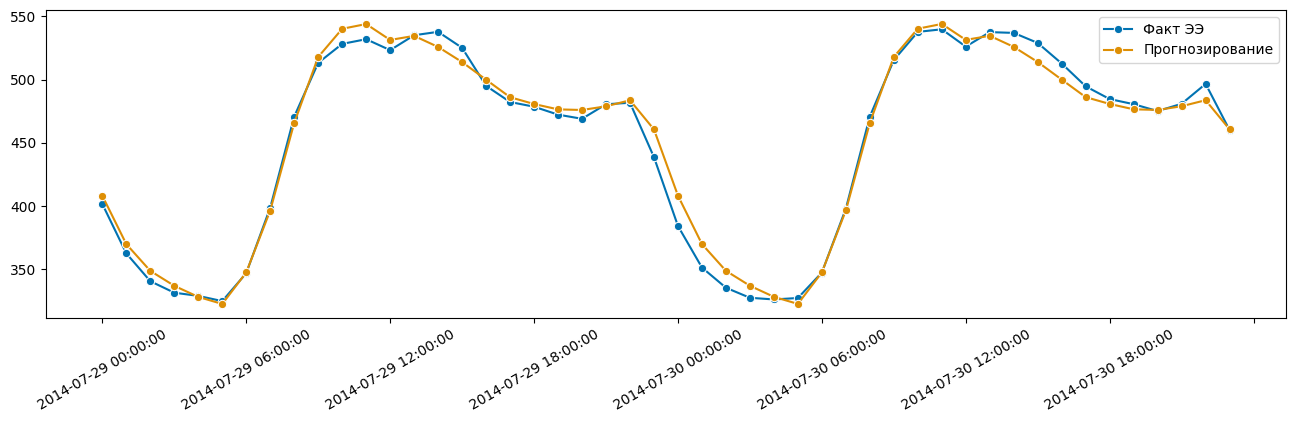

In [17]:
#прогнозируем методом экспоненциального сглаживания

forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=24, damped_trend = True, initialization_method='heuristic')
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_test, y_pred, labels=["Факт ЭЭ", "Прогнозирование"])
plt.xticks(rotation=30)

In [18]:
#считаем критерий MAPE

mape(y_test, y_pred)

1.488628509184003

In [22]:
#заполняем изначальные цены на тестовом интервале согласно двухтарифному учету

energy1 = y_pred['Факт ЭЭ'].to_list()
energy1

dvyxst_price = []
for i in range(len(energy1)):
    if ((i % 24) >= 0 and (i % 24) <= 6) or ((i % 24) == 23):
        dvyxst_price.append(2.65)
    else:
        dvyxst_price.append(6.82)

price = dvyxst_price

In [24]:
#считаем общше затраты пользователей, на прогнозируемом участке

tc1 = 0
for i in range(len(dvyxst_price)):
    tc1 += dvyxst_price[i] * energy1[i]

tc = 0

for i in range(len(energy1)):
    tc += energy1[i] * price[i]

energy_test = energy1.copy()
energy = energy1.copy()

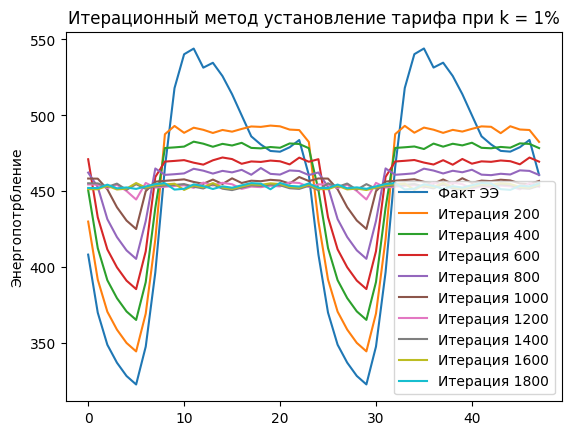

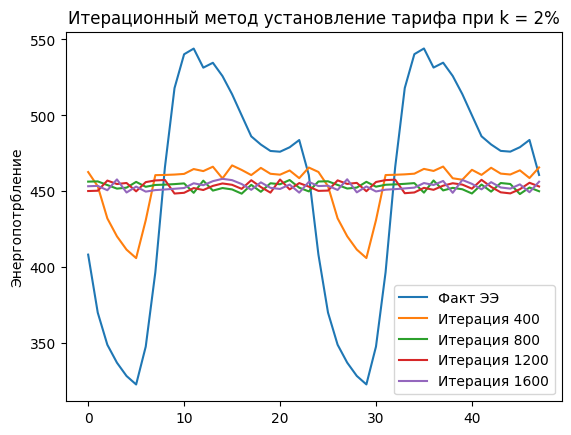

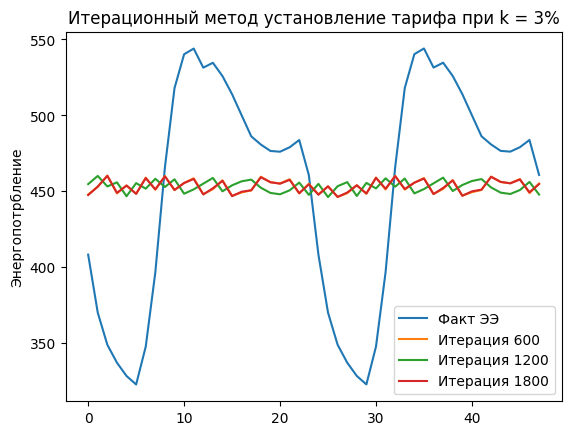

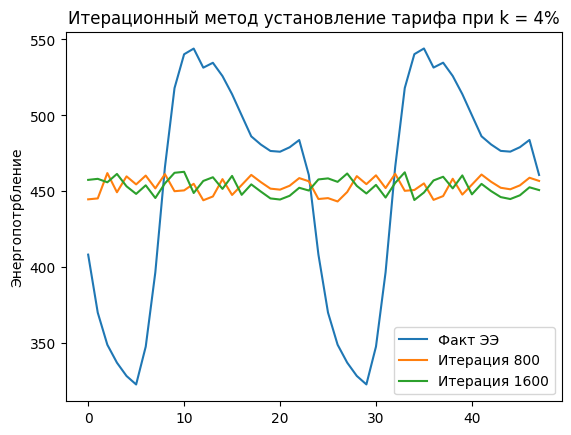

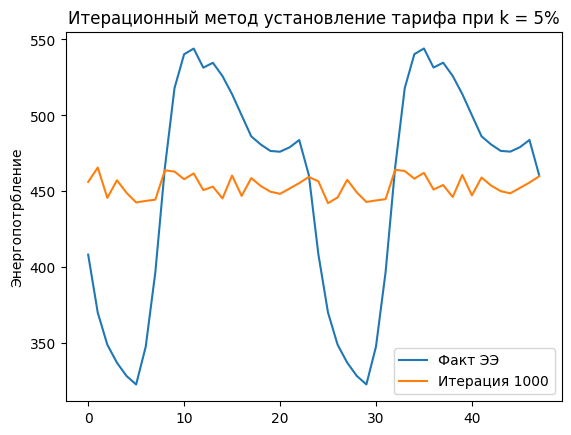

In [32]:
#Алгоритм, который реализовавыет итерационное установление динамических тарифов

time = [i for i in range (0, 48)]

for tr in range (1, 6):
    energy_test = energy1.copy()
    energy = energy1.copy()
    
    plt.plot(time, energy1, label='Факт ЭЭ')
    plt.title(f"Итерационный метод установление тарифа при k = {tr}%")
    plt.ylabel('Энергопотрбление') 
    # plt.legend()
    for i in range(0, 2000):
        maxen = 0
        ind = 0
        for j in range(len(energy)):
            if energy[j] > maxen:
                maxen = energy[j]
                ind = j

        # print(energy)
        
        for j in range(len(energy)):
            if j == ind:
                energy[j] = (1 - tr/100) * energy[j]
                price[j] = (1 + tr/100) * price[j]
            else:
                energy[j] = energy[j] + (maxen * (tr/100)) / (len(energy) - 1)

        # print(energy)
        
        cmp = 0
        
        for j in range(len(energy)):
            if j != ind:
                cmp += price[j] * energy[j]
        
        x = (tc - energy[ind] * price[ind] - cmp) * 100 / (-cmp)

        if i % (tr * 200) == 0 and i != 0:
            plt.plot(time, energy, label=f'Итерация {i}')
            plt.legend()

        # print(price)
        tc = 0
        for j in range(len(energy)):
            if j != ind:
                price[j] = price[j] * (1 - x / 100)
            tc += energy[j] * price[j]
    plt.show()

In [33]:
#ARIMA

In [34]:
df = pd.read_excel('/Users/New/Desktop/данные/ТВЕРЬАТОМ.xlsx')
df = df.rename(columns={'Дата мск':'Время', 'ТВЕРЬ план':'План ЭЭ', 'ТВЕРЬ факт':'Факт ЭЭ'})
df['% автономных устройств'] = 1
df = df[['Время', 'Факт ЭЭ']]
df = df.iloc[:26280]
df.index = df['Время']
df = df.drop(['Время'], axis=1)
df.head()

,Факт ЭЭ
Время,
2014-06-01 00:00:00,391.526
2014-06-01 01:00:00,355.271
2014-06-01 02:00:00,336.020
2014-06-01 03:00:00,326.523
2014-06-01 04:00:00,315.017


In [35]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

<Axes: title={'center': 'Потребление электроэнергии'}, xlabel='Время'>

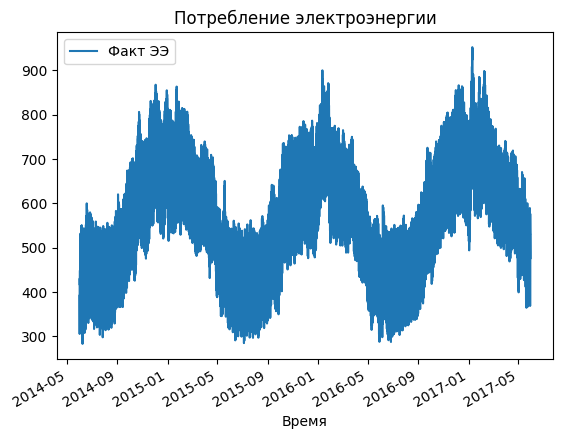

In [36]:
df.plot(title='Потребление электроэнергии')

In [37]:
ad_test(df)

1. ADF :  -4.5893663573710946
2. P-Value :  0.00013512626307331347
3. Num Of Lags :  49
4.  26230
5. Critical Values : 
	 1% :  -3.43059933054021
	 5% :  -2.861650196777599
	 10% :  -2.566828654483077


In [38]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [39]:
stepwise_fit = auto_arima(df, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=216478.185, Time=6.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=248892.500, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=225728.393, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=229152.867, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=248890.501, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=220562.126, Time=2.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=219773.857, Time=1.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=216452.039, Time=11.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=216585.247, Time=10.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=216433.334, Time=13.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=216433.709, Time=9.08 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=216750.507, Time=18.25 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=215990.185, Time=20.58 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                26280
Model:               SARIMAX(4, 1, 4)   Log Likelihood             -106080.034
Date:                Sat, 18 May 2024   AIC                         212178.069
Time:                        12:15:47   BIC                         212251.657
Sample:                             0   HQIC                        212201.830
                              - 26280                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.7202      0.005    525.125      0.000       2.710       2.730
ar.L2         -3.5426      0.010   -354.511      0.000      -3.562      -3.523
ar.L3          2.5407      0.010    255.491      0.000       2.521       2.560
ar.L4         -0.8263      0.005   -166.181      0.000      -0.836      -0.817
ma.L1         -1.7999      0.007   -249.976      0.000      -1.814      -1.786
ma.L2          1.5814      0.014    116.296      0.000       1.555       1.608
ma.L3         -0.5949      0.013    -44.681      0.000      -0.621      -0.569
ma.L4         -0.1687      0.007    -24.449      0.000      -0.182      -0.155
sigma2       190.1098      1.500    126.761      0.000     187.170     193.049
===================================================================================
Ljung-Box (L1) (Q):                  67.11   Jarque-Bera (JB):              4110.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
train = df.iloc[:-24]
test = df.iloc[-24:]
print(train.shape, test.shape)
train

import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train['Факт ЭЭ'], order=(24,0,1))
model = model.fit()
model.summary()

(26256, 1) (24, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Факт ЭЭ   No. Observations:                26256
Model:                ARIMA(24, 0, 1)   Log Likelihood              -97094.401
Date:                Sat, 18 May 2024   AIC                         194242.801
Time:                        12:19:50   BIC                         194463.544
Sample:                             0   HQIC                        194314.081
                              - 26256                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        572.3912     14.331     39.940      0.000     544.303     600.480
ar.L1          1.7942      0.008    234.666      0.000       1.779       1.809
ar.L2         -1.1168      0.015    -74.130      0.000      -1.146      -1.087
ar.L3          0.3064      0.018     17.217      0.000       0.272       0.341
ar.L4          0.0030      0.020      0.153      0.879      -0.036       0.042
ar.L5          0.0490      0.020      2.448      0.014       0.010       0.088
ar.L6         -0.1455      0.019     -7.739      0.000      -0.182      -0.109
ar.L7          0.2005      0.017     11.709      0.000       0.167       0.234
ar.L8         -0.2186      0.016    -13.477      0.000      -0.250      -0.187
ar.L9          0.1008      0.016      6.416      0.000       0.070       0.132
ar.L10         0.0682      0.016      4.205      0.000       0.036       0.100
ar.L11        -0.1262      0.017     -7.486      0.000      -0.159      -0.093
ar.L12         0.1788      0.017     10.587      0.000       0.146       0.212
ar.L13        -0.2518      0.016    -15.300      0.000      -0.284      -0.220
ar.L14         0.2858      0.016     18.269      0.000       0.255       0.317
ar.L15        -0.3221      0.015    -21.112      0.000      -0.352      -0.292
ar.L16         0.2663      0.016     16.783      0.000       0.235       0.297
ar.L17        -0.0910      0.017     -5.476      0.000      -0.124      -0.058
ar.L18        -0.0973      0.017     -5.749      0.000      -0.131      -0.064
ar.L19         0.2617      0.017     15.303      0.000       0.228       0.295
ar.L20        -0.3670      0.017    -21.452      0.000      -0.401      -0.333
ar.L21         0.4158      0.017     24.841      0.000       0.383       0.449
ar.L22        -0.5295      0.016    -33.838      0.000      -0.560      -0.499
ar.L23         0.9316      0.013     73.132      0.000       0.907       0.957
ar.L24        -0.5993      0.006   -108.662      0.000      -0.610      -0.589
ma.L1         -0.4656      0.007    -63.098      0.000      -0.480      -0.451
sigma2       104.7826      0.768    136.456      0.000     103.278     106.288
===================================================================================
Ljung-Box (L1) (Q):                 503.68   Jarque-Bera (JB):              7820.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels')
pred.index=df.index[start:end+1]

<Axes: xlabel='Время', ylabel='Энергопотрбление'>

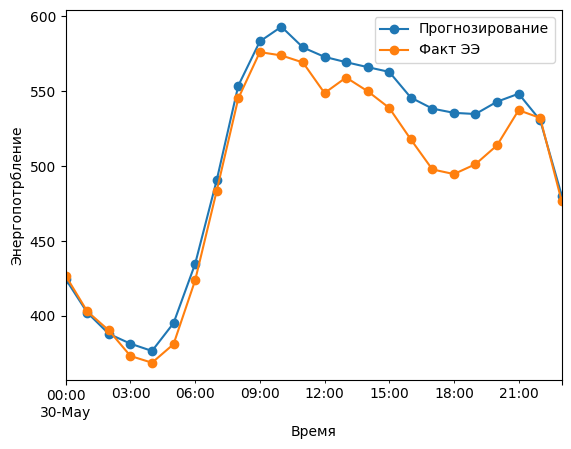

In [42]:
plt.ylabel('Энергопотрбление') 
pred.plot(legend=True, label='Прогнозирование', marker='o')
test['Факт ЭЭ'].plot(legend=True, marker='o')

In [43]:
mape(pred, test['Факт ЭЭ'])

2.8751883412235935

2.573245366761297


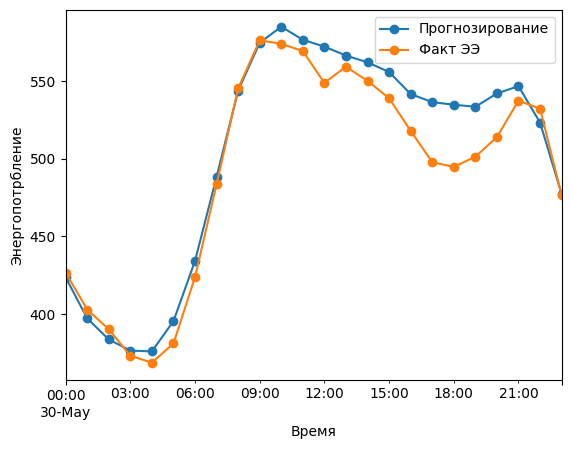

2.8751883412235935


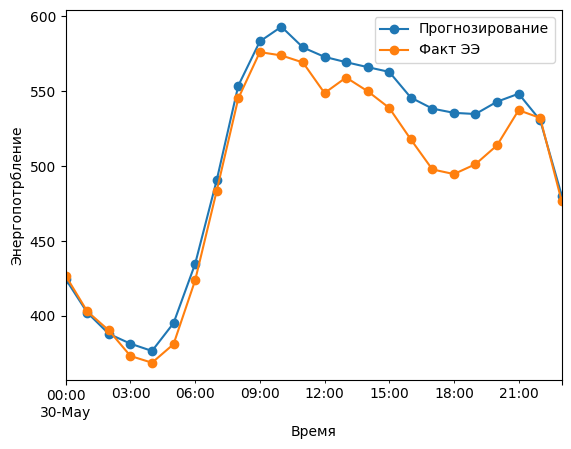

2.647765926911455


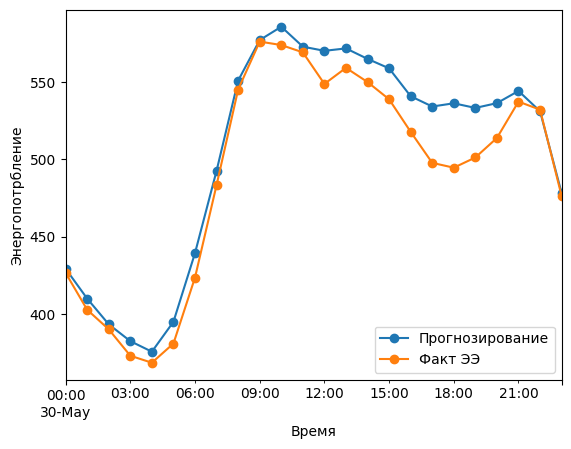

3.238867585796059


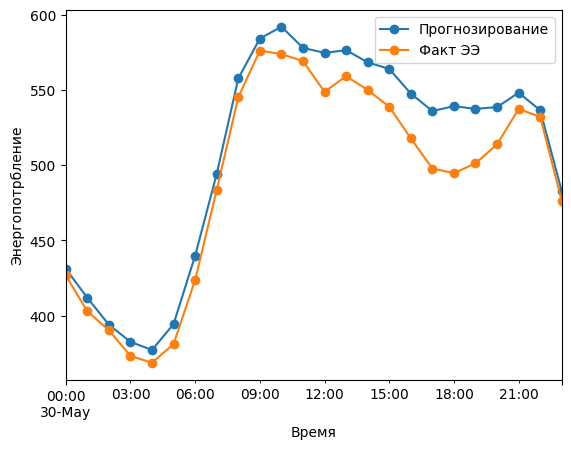

KeyboardInterrupt: 

In [46]:
for i in range(10):
    model = sm.tsa.arima.ARIMA(train['Факт ЭЭ'], order=(24,0,i))
    model = model.fit()
    model.summary()
    start=len(train)
    end=len(train)+len(test)-1
    pred=model.predict(start=start, end=end, typ='levels')
    pred.index=df.index[start:end+1]
    plt.ylabel('Энергопотрбление') 
    pred.plot(legend=True, label='Прогнозирование', marker='o')
    test['Факт ЭЭ'].plot(legend=True, marker='o')
    print(mape(pred, test['Факт ЭЭ']))
    plt.show()